In [1]:
from transforms import RandomFlip, RandomRotate, RandomRotate90, Normalize, AdditiveGaussianNoise, AdditivePoissonNoise, Standardize, LabelsToMask
import matplotlib.pyplot as plt
import h5py
import numpy as np

path = '../datasets/sample_aet_volume.h5'
with h5py.File(path, 'r') as f:
    raw = f['raw'][...]
    label = f['label'][...]

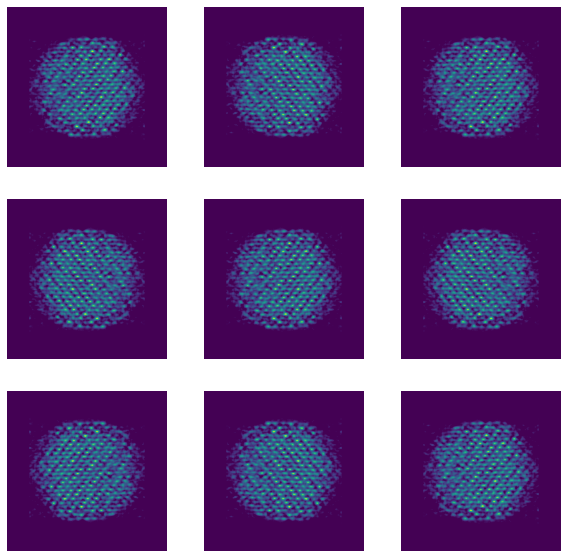

In [7]:
mid_raw = np.expand_dims(raw[raw.shape[0] // 2], 0)
mid_label = np.expand_dims(label[raw.shape[0] // 2], 0)

t = RandomFlip(np.random.RandomState())

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(mid_raw[0])
ax[0].set_axis_off()

for i in range(1, 9):
    ax[i].set_axis_off()
    ax[i].imshow(t(mid_raw)[0])

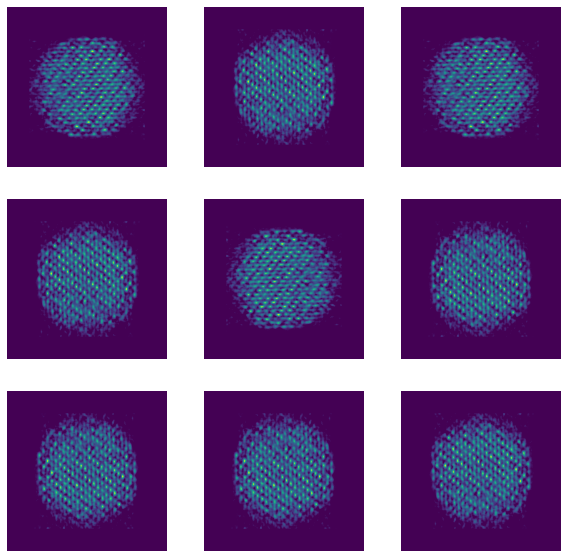

In [8]:
t = RandomRotate90(np.random.RandomState())

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(mid_raw[0])
ax[0].set_axis_off()

for i in range(1, 9):
    ax[i].set_axis_off()
    ax[i].imshow(t(mid_raw)[0])

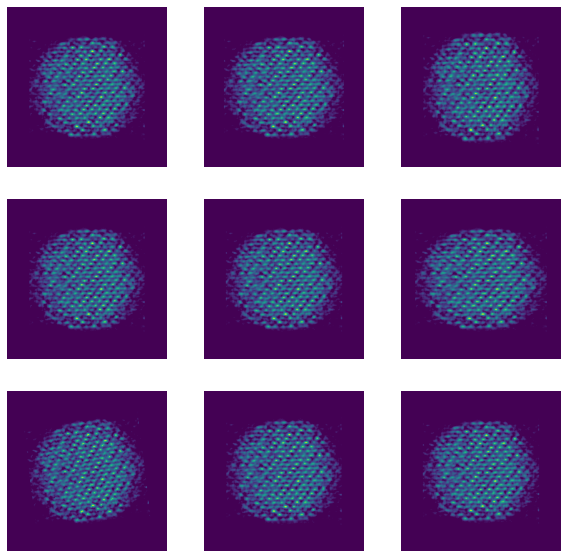

In [9]:
t = RandomRotate(np.random.RandomState(), angle_spectrum=30)

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(mid_raw[0])
ax[0].set_axis_off()

for i in range(1, 9):
    ax[i].set_axis_off()
    ax[i].imshow(t(mid_raw)[0])

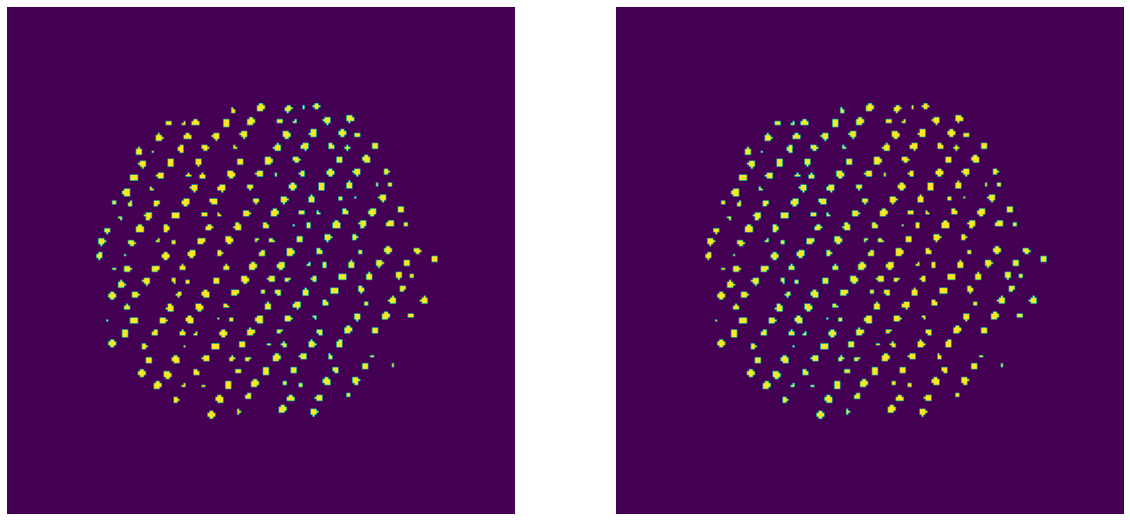

In [2]:
t = LabelsToMask(append_label=True)

fig, axes = plt.subplots(1, 2, figsize=(20, 20))
ax = axes.ravel()

mid_z = raw.shape[0] // 2

ax[0].imshow(label[mid_z,])
ax[0].set_axis_off()

for i in range(1, 2):
    ax[i].set_axis_off()
    ax[i].imshow(t(label)[0,mid_z,])

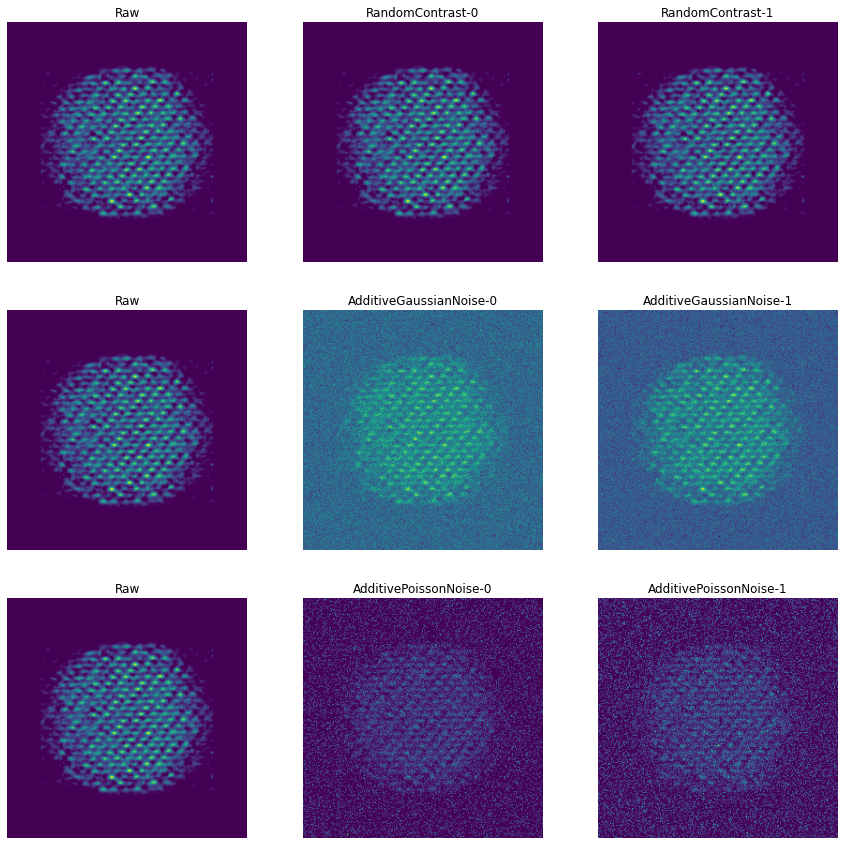

In [27]:
# demo some of the augmentations
rs = np.random.RandomState()
raw_transformers = [RandomContrast(rs, alpha=(0.5, 1.5), execution_probability=1.0), AdditiveGaussianNoise(rs, scale=(0.0, 0.5), execution_probability=1.0), AdditivePoissonNoise(rs, lam=(0.0, 0.5), execution_probability=1.0)]

with h5py.File(path, 'r') as f:
    raw = f['raw'][...]
    mid_z = raw.shape[0] // 2
    # raw = Standardize(mean=np.mean(raw), std=np.std(raw))(raw)
    raw = Normalize(np.min(raw), np.max(raw))(raw)
    label = f['label'][...]
    
    # show transforms
    fig, axes = plt.subplots(len(raw_transformers), 3, figsize=(15, len(raw_transformers) * 5))
    ax = axes.ravel()
    
    for t, i in enumerate(range(0, 3 * len(raw_transformers), 3)):
        transformer = raw_transformers[t]
        ax[i].set_title('Raw')
        ax[i].imshow(raw[mid_z, ...])
        ax[i].set_axis_off()

        # show boundary for the 1st offset
        ax[i+1].set_title(f'{type(transformer).__name__}-0')
        aug = transformer(raw)
        ax[i+1].imshow(aug[mid_z, ...])
        ax[i+1].set_axis_off()

        # show boundary for the 4th offset
        ax[i+2].set_title(f'{type(transformer).__name__}-1')
        aug = transformer(raw)
        ax[i+2].imshow(aug[mid_z, ...])
        ax[i+2].set_axis_off()

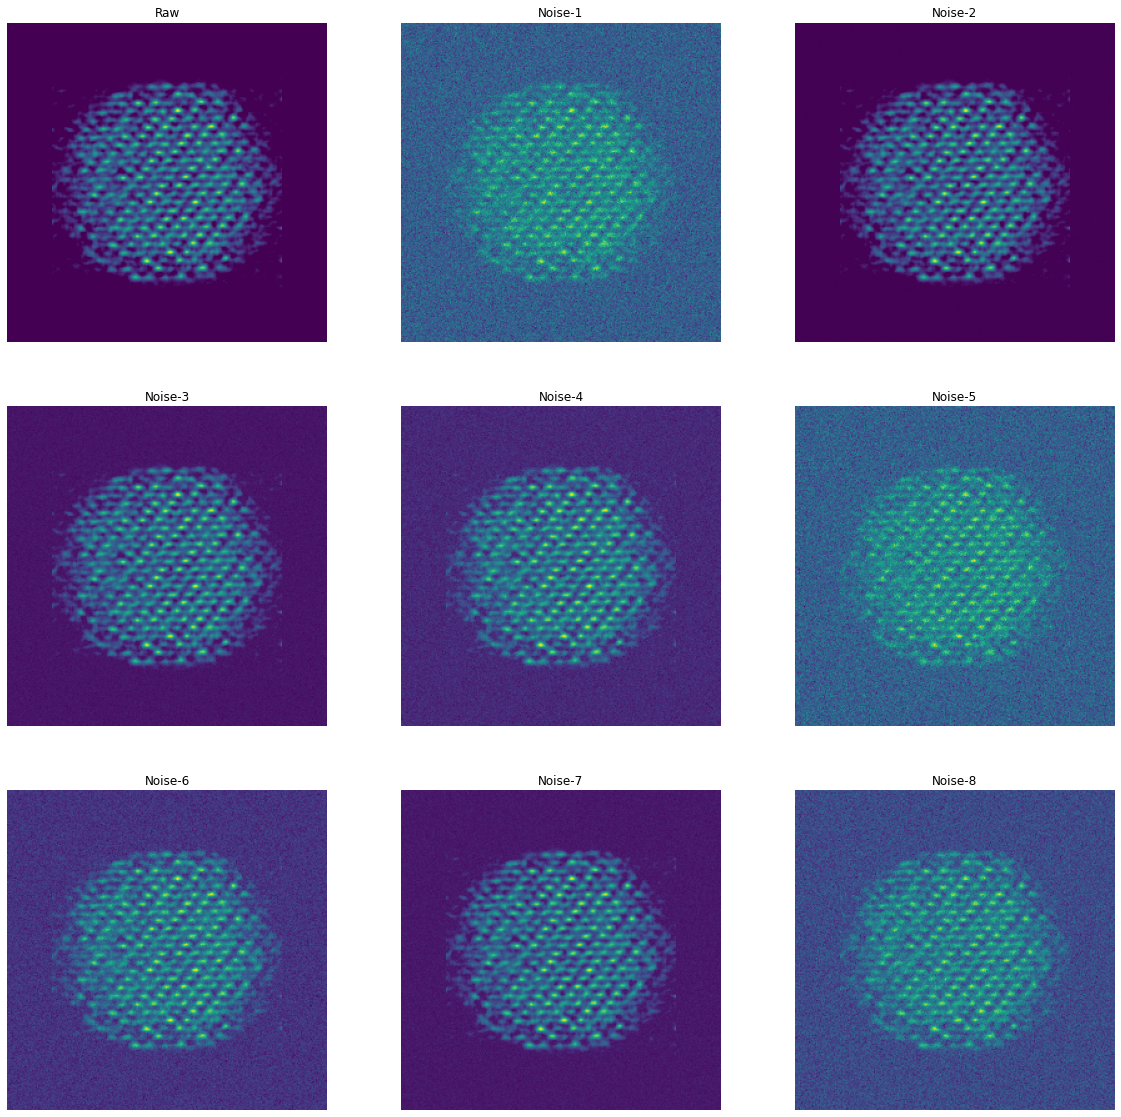

In [36]:
# demo AdditiveGaussianNoise
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
ax = axes.ravel()

rs = np.random.RandomState()
transformer = AdditiveGaussianNoise(rs, scale=(0.0, 0.25), execution_probability=1.0)

ax[0].set_title('Raw')
ax[0].imshow(raw[mid_z, ...])
ax[0].set_axis_off()
for i in range(1, 9):
    ax[i].set_title(f'Noise-{i}')
    aug = transformer(raw)
    ax[i].imshow(aug[mid_z, ...])
    ax[i].set_axis_off()

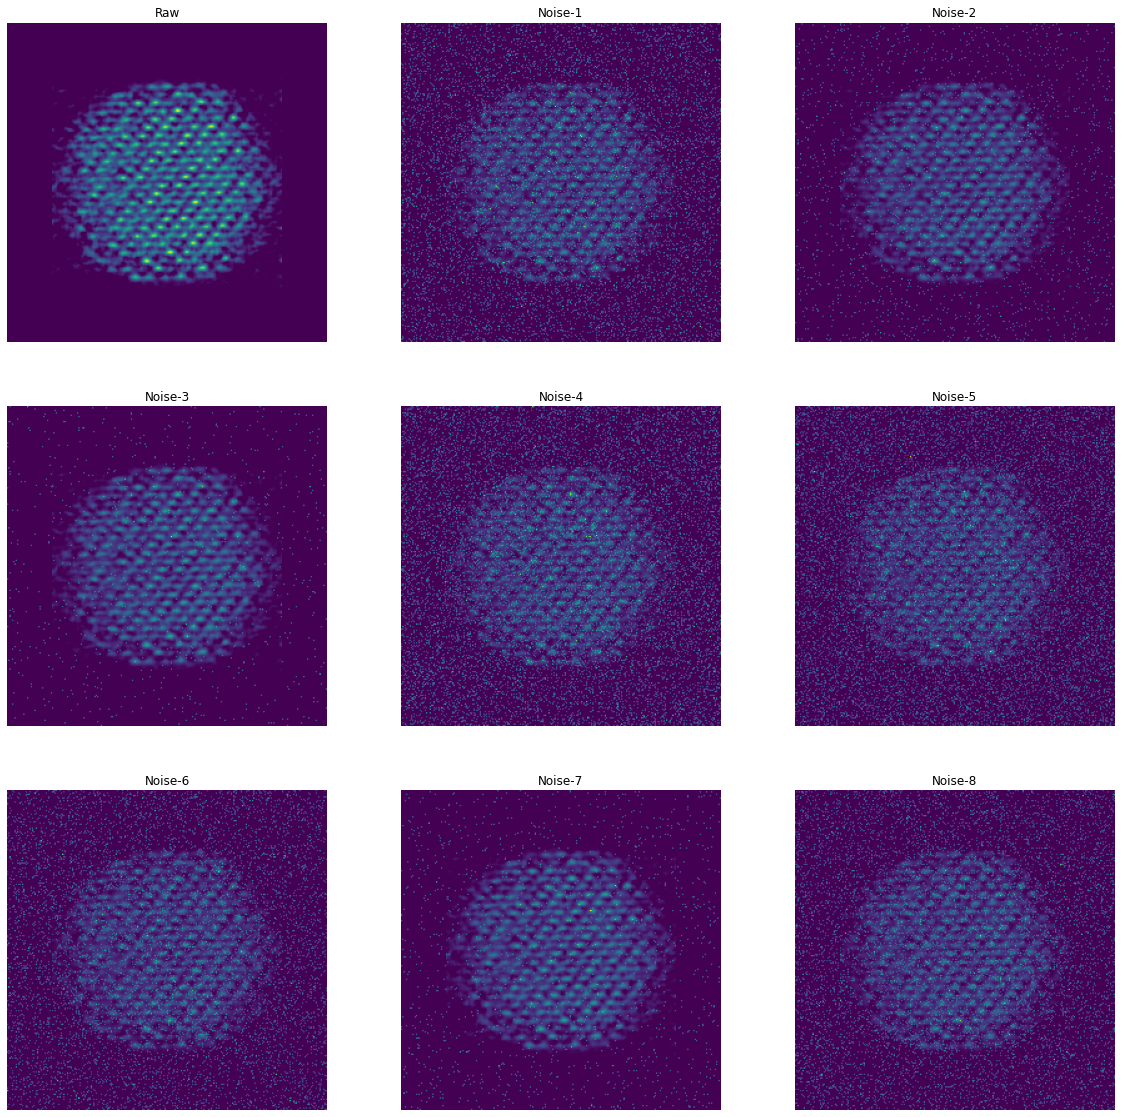

In [34]:
# demo AdditivePoissonNoise
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
ax = axes.ravel()

rs = np.random.RandomState()
transformer = AdditivePoissonNoise(rs, lam=(0.0, 0.25), execution_probability=1.0)

ax[0].set_title('Raw')
ax[0].imshow(raw[mid_z, ...])
ax[0].set_axis_off()
for i in range(1, 9):
    ax[i].set_title(f'Noise-{i}')
    aug = transformer(raw)
    ax[i].imshow(aug[mid_z, ...])
    ax[i].set_axis_off()

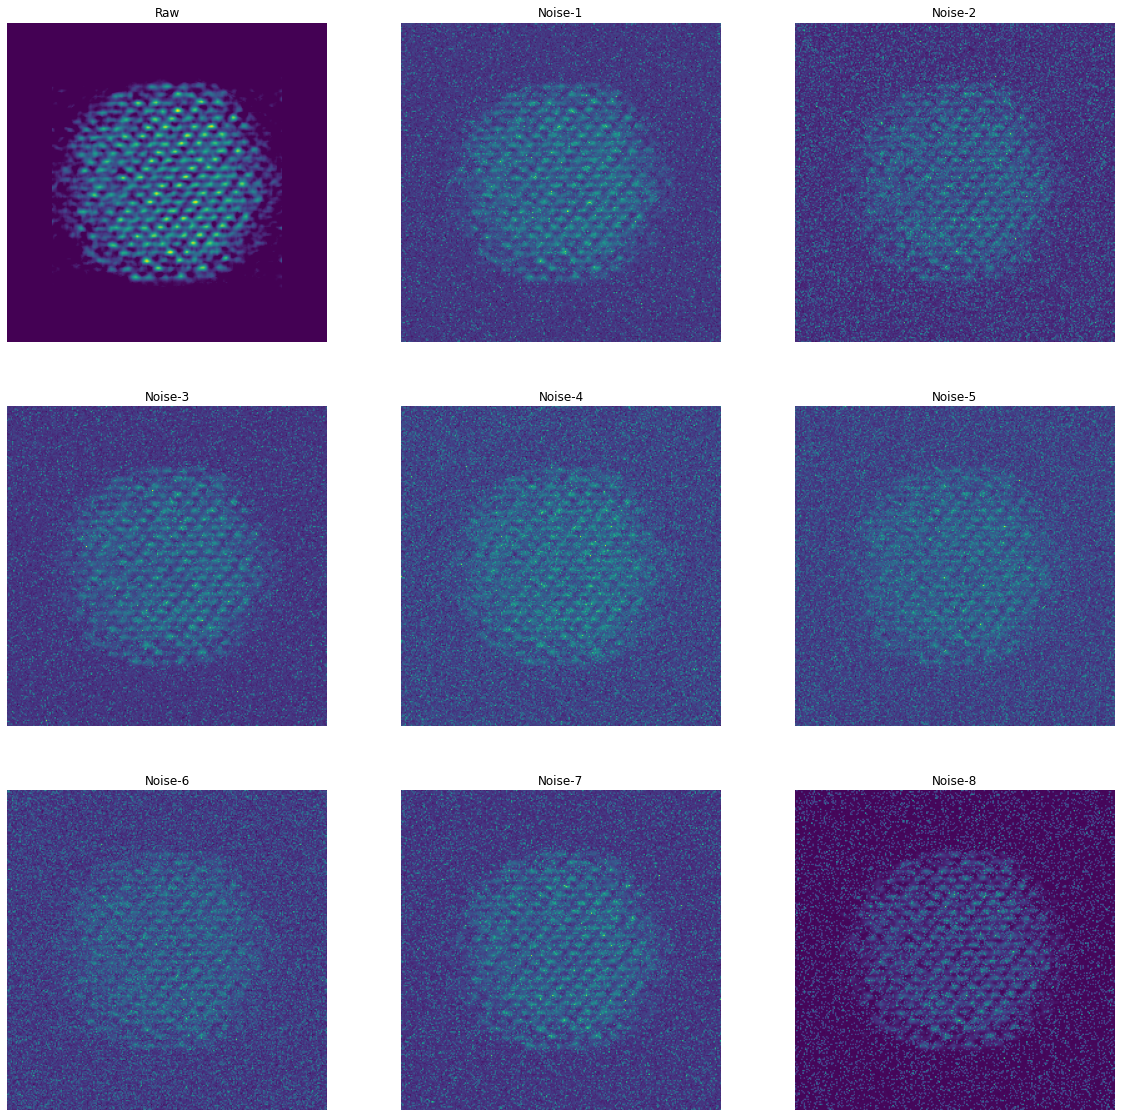

In [37]:
# demo Additive Poisson and Gaussian Noise
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
ax = axes.ravel()

rs = np.random.RandomState()
t1 = AdditiveGaussianNoise(rs, scale=(0.0, 0.25), execution_probability=1.0)
t2 = AdditivePoissonNoise(rs, lam=(0.0, 0.25), execution_probability=1.0)

ax[0].set_title('Raw')
ax[0].imshow(raw[mid_z, ...])
ax[0].set_axis_off()
for i in range(1, 9):
    ax[i].set_title(f'Noise-{i}')
    aug = t1(t2(raw))
    ax[i].imshow(aug[mid_z, ...])
    ax[i].set_axis_off()